In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\churn_data.csv")
df.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df = df.drop(columns=['customerID', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [6]:
df.head(2)

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0


In [7]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [8]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [9]:
x = df.iloc[:, :-1]
y = df['Churn']

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler()
rs_x, rs_y = rs.fit_resample(x, y)

In [11]:
print(rs_x.shape, rs_y.shape)

(3738, 3) (3738,)


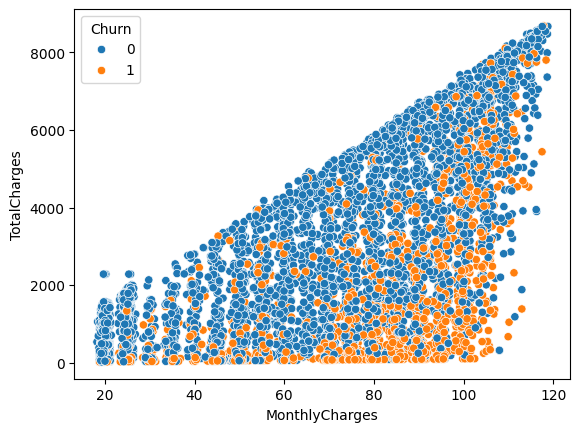

In [12]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn' )
plt.show()

In [13]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2265.000258,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.225000,0.000000
50%,29.000000,70.350000,1400.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(rs_x, rs_y, test_size=0.2, random_state=42)

In [15]:
from sklearn.svm import SVC

sv = SVC(kernel='rbf')
sv.fit(x_train, y_train)

SVC()

In [16]:
sv.score(x_test, y_test)*100

66.0427807486631